# Real Generation Graphics

- Author: Victor Muñoz
- Collaborator: Nicolás Otárola
- Pvlib_version: 0.6.3
- Date : 17-01-2022 

In [1]:
# data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Photovoltaic systems
import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain

# paths
file_path_gen = '../../Data/Real_Generations_Data/'
file_path_solcast = '../../Data/Solcast_Data/'
file_path_func = '../../Functions/'

# functions AND system photovoltaic
import sys
sys.path.append(file_path_gen)
sys.path.append(file_path_solcast)
sys.path.append(file_path_func)

import functions as func
import imp
imp.reload(func)

# save graphics
%matplotlib inline
%matplotlib notebook

import bokeh as boken
import bokeh.palettes as bkpalet #from bokeh.palettes import PuOr
import bokeh.transform as bktrans # from bokeh.transform import cumsums


## 1) Data_real

In [2]:
# read pickle
file_name = 'Real_Generations'
file_ext = 'xlsx'
data_pickle = func.data_to_pickle(file_path_gen,file_name,file_ext)

Pickle found in: ../../Data/Real_Generations_Data/Real_Generations.pickle
Returning data


In [3]:
#data_pickle

## 2) Graph_per_hour

In [34]:
# names to seach
names_pv = ['PMGD PFV SANTA INES SOLAR',
           'PMGD PFV TILTIL',
           'PMGD PFV LLAY LLAY',
           'PMGD PFV LINGUE',
           'PMGD PFV ALTOS DE TILTIL']

In [35]:
# find hourly logs for each name
data_hours = func.filter_hour_from_dataFrame(data=data_pickle,
                                      #columns_names=[],
                                      #column_fecha='Fecha'
                                      #column_central='Central',
                                      #first_year=2021,
                                      #last_year=2021,
                                      names_pv=names_pv,
                                      #months=[7,8,9,10,11,12],
                                      p = False)

- Using default  ['Hora 1', 'Hora 2', 'Hora 3', 'Hora 4', 'Hora 5', 'Hora 6', 'Hora 7', 'Hora 8', 'Hora 9', 'Hora 10', 'Hora 11', 'Hora 12', 'Hora 13', 'Hora 14', 'Hora 15', 'Hora 16', 'Hora 17', 'Hora 18', 'Hora 19', 'Hora 20', 'Hora 21', 'Hora 22', 'Hora 23', 'Hora 24'] for columns_names 

- Using default Fecha for column_fecha 

- Using default Central for column_central 

- Using default 0 for first_year 

- Using default 10000 for last_year 



PMGD PFV SANTA INES SOLAR len: 9936


<IPython.core.display.Javascript object>


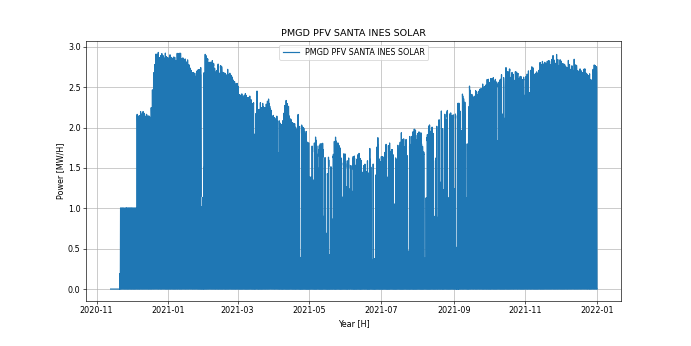

In [33]:
func.graph(data=data_hours,
           x_label= 'Year [H]',
           y_label='Power [MW/H]',
           name='hour')

## 3) Graph_per_day

In [26]:
# find daily logs for each name
data_days = func.filter_day_from_dataFrame(data=data_pickle,
                                      #column_fecha='Fecha'
                                      #column_total='Total'
                                      #column_central='Central',
                                      #first_year=2021,
                                      #last_year=2021,
                                      names_pv=names_pv,
                                      #months=[7,8,9,10,11,12],
                                      p = False)

- Using default Fecha for column_fecha 

- Using default Total for column_total 

- Using default Central for column_central 

- Using default 0 for first_year 

- Using default 10000 for last_year 



PMGD PFV SANTA INES SOLAR len: 414


<IPython.core.display.Javascript object>


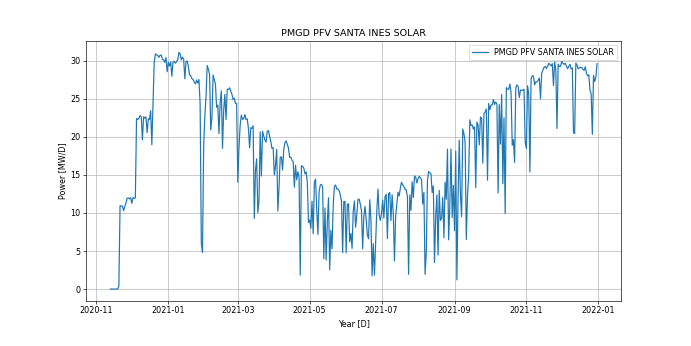

In [27]:
func.graph(data=data_days,
           x_label= 'Year [D]',
           y_label='Power [MW/D]',
           name='days')

## 4) Graph_per_month

In [28]:
# find daily logs for each name
data_months = func.filter_month_from_dataFrame(data=data_pickle,
                                      #column_fecha='Fecha'
                                      #column_total='Total'
                                      #column_central='Central',
                                      #first_year=2021,
                                      #last_year=2021,
                                      names_pv=names_pv,
                                      #months=[7,8,9,10,11,12],
                                      p = False)

- Using default Fecha for column_fecha 

- Using default Total for column_total 

- Using default Central for column_central 

- Using default 0 for first_year 

- Using default 10000 for last_year 



PMGD PFV SANTA INES SOLAR len: 14


<IPython.core.display.Javascript object>


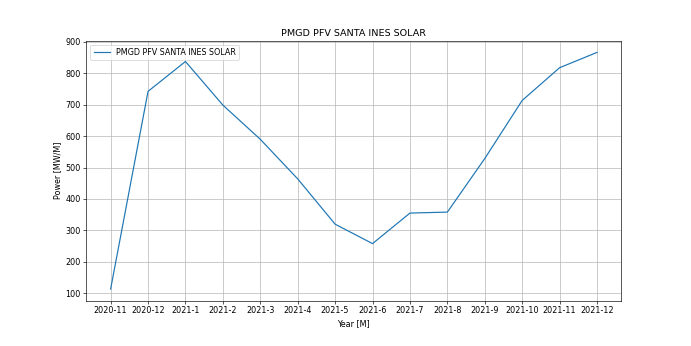

In [29]:
func.graph(data=data_months,
           x_label= 'Year [M]',
           y_label='Power [MW/M]',
           name='month')

In [ ]:
# names for photovoltaics systems
#name_pv = ['PMGD PFV VALLE DE LA LUNA II','PMGD PFV MARCHIGUE II','PMGD PFV CABILSOL','PMGD PFV PILPILEN','PMGD PFV EL GUANACO SOLAR']
name_pv = ['PMGD PFV LLAY LLAY']
data_sub = data_pickle.loc[data_pickle['Central'] == name_pv[0]]
dic_data_sub = {}
year = 2021
for i in name_pv:
    filter_data = data_pickle[['Fecha', 'año', 'Total']]
    filter_data = filter_data.loc[data_pickle['Central'] == i]
    filter_data = filter_data.loc[filter_data['año'] == year]
    filter_data = filter_data[['Fecha','Total']]
    dic_data_sub[i] = filter_data

        
print(dic_data_sub[name_pv[0]])

for i in dic_data_sub:
    filter_data = dic_data_sub[i]
    plt.figure(figsize=(12,6))
    plt.plot(range(len(filter_data)),filter_data['Total'],label='Generación Real')
    #plt.plot(range(len(filter_data)),filter_data['Total'],label='Generación Pred')
    plt.xlabel('Año '+str(year)+' [D]')
    plt.ylabel('Potencia [MW/D]')
    plt.legend()
    plt.grid()
    plt.title(i)
    plt.savefig(i+'.png',dpi=400)
    plt.show()
    
    
    source = dic_data_sub #bkmdl.ColumnDataSource(dict_source)
    
    p = boken.plotting.figure(x_axis_label='x',
                               y_axis_label = 'y',
                               #x_axis_type= 'datetime',
                               plot_height = 600, 
                               plot_width=1200,
                               #tools="pan,reset,save",
                               title = 't')
    p.line(x=range(len(filter_data)),y=filter_data['Total'], line_width = 2 )
    #p.yaxis.formatter = boken.models.BasicTickFormatter(use_scientific = True)

    #p.source(x=range(len(filter_data)),y=filter_data['Total'])
    output_file(i+'.html')
    show(p)


In [ ]:
# names for photovoltaics systems
#name_pv = ['PMGD PFV VALLE DE LA LUNA II','PMGD PFV MARCHIGUE II','PMGD PFV CABILSOL','PMGD PFV PILPILEN','PMGD PFV EL GUANACO SOLAR']
name_pv = ['PMGD PFV ALTOS DE TILTIL']
data_sub = data_pickle.loc[data_pickle['Central'] == name_pv[0]]
dic_data_sub = {}
year = 2019
for i in name_pv:
    filter_data = data_pickle[['Fecha', 'año', 'Total']]
    filter_data = filter_data.loc[data_pickle['Central'] == i]
    filter_data = filter_data.loc[filter_data['año'] == year]
    filter_data = filter_data[['Fecha','Total']]
    dic_data_sub[i] = filter_data

year = 2020
for i in name_pv:
    filter_data = data_pickle[['Fecha', 'año', 'Total']]
    filter_data = filter_data.loc[data_pickle['Central'] == i]
    filter_data = filter_data.loc[filter_data['año'] == year]
    filter_data = filter_data[['Fecha','Total']]
    dic_data_sub[i] = dic_data_sub[i].append(filter_data)
    
year = 2021
for i in name_pv:
    filter_data = data_pickle[['Fecha', 'año', 'Total']]
    filter_data = filter_data.loc[data_pickle['Central'] == i]
    filter_data = filter_data.loc[filter_data['año'] == year]
    filter_data = filter_data[['Fecha','Total']]
    dic_data_sub[i] = dic_data_sub[i].append(filter_data)

        
print(dic_data_sub[name_pv[0]])

for i in dic_data_sub:
    filter_data = dic_data_sub[i]
    plt.figure(figsize=(12,6))
    plt.plot(range(len(filter_data)),filter_data['Total'],label='Generación Real')
    #plt.plot(range(len(filter_data)),filter_data['Total'],label='Generación Pred')
    plt.xlabel('Año '+str(year)+' [D]')
    plt.ylabel('Potencia [MW/D]')
    plt.legend()
    plt.grid()
    plt.title(i)
    plt.savefig(i+'.png',dpi=400)
    plt.show()
    
    
    source = dic_data_sub #bkmdl.ColumnDataSource(dict_source)
    
    p = boken.plotting.figure(x_axis_label='x',
                               y_axis_label = 'y',
                               #x_axis_type= 'datetime',
                               plot_height = 600, 
                               plot_width=1200,
                               #tools="pan,reset,save",
                               title = 't')
    p.line(x=range(len(filter_data)),y=filter_data['Total'], line_width = 2 )
    #p.yaxis.formatter = boken.models.BasicTickFormatter(use_scientific = True)

    #p.source(x=range(len(filter_data)),y=filter_data['Total'])
    output_file(i+'.html')
    show(p)


In [ ]:
# names for photovoltaics systems
#name_pv = ['PMGD PFV VALLE DE LA LUNA II','PMGD PFV MARCHIGUE II','PMGD PFV CABILSOL','PMGD PFV PILPILEN','PMGD PFV EL GUANACO SOLAR']
name_pv = ['PMGD PFV LINGUE']
data_sub = data_pickle.loc[data_pickle['Central'] == name_pv[0]]
dic_data_sub = {}
year = 2021
for i in name_pv:
    filter_data = data_pickle[['Fecha', 'año', 'Total']]
    filter_data = filter_data.loc[data_pickle['Central'] == i]
    filter_data = filter_data.loc[filter_data['año'] == year]
    filter_data = filter_data[['Fecha','Total']]
    dic_data_sub[i] = filter_data

        
print(dic_data_sub[name_pv[0]])

for i in dic_data_sub:
    filter_data = dic_data_sub[i]
    plt.figure(figsize=(12,6))
    plt.plot(range(len(filter_data)),filter_data['Total'],label='Generación Real')
    #plt.plot(range(len(filter_data)),filter_data['Total'],label='Generación Pred')
    plt.xlabel('Año '+str(year)+' [D]')
    plt.ylabel('Potencia [MW/D]')
    plt.legend()
    plt.grid()
    plt.title(i)
    plt.savefig(i+'.png',dpi=400)
    plt.show()
    
    
    source = dic_data_sub #bkmdl.ColumnDataSource(dict_source)
    
    p = boken.plotting.figure(x_axis_label='x',
                               y_axis_label = 'y',
                               #x_axis_type= 'datetime',
                               plot_height = 600, 
                               plot_width=1200,
                               #tools="pan,reset,save",
                               title = 't')
    p.line(x=range(len(filter_data)),y=filter_data['Total'], line_width = 2 )
    #p.yaxis.formatter = boken.models.BasicTickFormatter(use_scientific = True)

    #p.source(x=range(len(filter_data)),y=filter_data['Total'])
    output_file(i+'.html')
    show(p)
